In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/train_cleaned.csv', index_col = 'Id', na_filter=False)
df_orig = pd.read_csv('datasets/train.csv', index_col='Id', na_filter=False)

In [4]:
# scale price to thousands of dollars
df['SalePrice'] = df['SalePrice']/1000

### Plot settings

In [5]:
sns.set_style('ticks')
sns.set_context('talk')
plt.rc('axes', titlecolor = 'dimgrey', labelcolor = 'dimgrey', labelsize = 15)

In [6]:
# for plot jitter
rng = np.random.default_rng()

### Helper Functions

#### Display all columns

In [7]:
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

#### Read Ordinal Scale

In [8]:
def read_map(map_):
    """map_ should be keyword 'qual' or "qual_na" or a dict. """

    # print(map_, type(map_))
    if type(map_) == dict:
        return map_

    elif type(map_) == list:
        return {val: i for i, val in enumerate(map_)}

    elif map_ == 'qual':
        return {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

    elif map_ == 'qual_na':
        return {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

    else:
        return map_

In [9]:
def ord_read(col_name, map_ = 'qual', df = df):
    map_ = read_map(map_)

    return df[col_name].map(map_)
        

In [10]:
def ord_gb_price(col_name, map_ = 'qual', col = 'SalePrice', df = df):
    map_ = read_map(map_)
    r_map = {val: key for key, val in map_.items()}
    idx_order = [r_map[i] for i in sorted(r_map.keys())]
    return df.groupby(col_name).agg([np.mean, len])[[col]]\
        .reindex(idx_order)

In [11]:
def ord_plot(col_name, map_ = 'qual', col = 'SalePrice', df = df):
    map_ = read_map(map_)
    gb = ord_gb_price(col_name, map_, col, df)
    gb.index = pd.RangeIndex(len(gb.index))
    # print(gb)
    sns.scatterplot(
        x = gb.index, 
        y = gb[(col, 'mean')],
        s = 1 + 4*np.sqrt(gb[(col, 'len')]))
    # return gb

    idx = ord_read(col_name, map_, df)
    sns.regplot(x = idx, y = df[col], scatter = False, color = 'orange')
    plt.show()

#### Compare categorical features

In [12]:
def gb_comp(col, df = df, sort_col = 'Count', sort_asc = False):
    """D"""
    gb = df.groupby(col, dropna = False)[['SalePrice']].agg(np.mean)
    gb['Count'] = df.groupby(col, dropna = False)['SalePrice'].count()
    return gb.sort_values(by = sort_col, ascending = sort_asc)

#### Plot helpers

In [64]:
def plot_bar(col, df = df, sort_col = 'Count', sort_asc = False, title = None, figsize_ = (10, 5.5)):
    plt.figure(figsize=figsize_)
    gb = gb_comp(col, df, sort_col, sort_asc)
    # print(gb.head())
    sns.barplot(x = col, y = 'SalePrice', data = df, order = gb.index, capsize=0.1)
    if title is None:
        title = f'Sale price by {col} type'
    plt.title(title, loc ='left')
    plt.xlabel(col.upper())
    plt.ylabel('SALE PRICE (thousands of $)')

In [65]:
def jitter(vals, j):
    return vals + rng.normal(0, j, len(vals))

In [71]:
def plot_reg(col, df = df, jitter_x = 0, s = 40, alpha = 1, figsize_ = (10, 5.5)):
    plt.figure(figsize=figsize_)
    if jitter_x > 0:
        df = df.copy()
        df[col] = jitter(df[col], jitter_x)

    sns.regplot(x = col, y = 'SalePrice', 
        data = df, 
        scatter_kws={'s': s, 'alpha': alpha},
        line_kws={'color': 'red'})

    plt.title(f"Sale price vs {col}", loc = "left")
    plt.xlabel(col.upper())
    plt.ylabel('SALE PRICE (thousands of $)')

### Columns

Plots used:
* Zoning 
* Neighborhood
* Overall Quality
* Decade
* House Style
* Garage type
* Rail Road
* Cond Pos

Regression variables:
* All plotting vars plus
* Gr Liv Area

In [16]:
df.columns

Index(['MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Roof Style', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Cond', 'Bsmt Qual',
       'Bsmt Exposure', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Type', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice', 'MoYr Sold', 'is Pool', 'Lot Ratio',
       'is Bsmt', 'Bsmt GLQ', 'is Fireplace', 'Fireplace Qual', 'Sum Bath',
       'Garage Ratio', 'is Shed', 'is PUD', 'Cond Feeder', 'Cond Artery',
       'Cond Pos', 'Cond RR', 'Porch SF', '

In [17]:
df_orig.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

### Price distribution

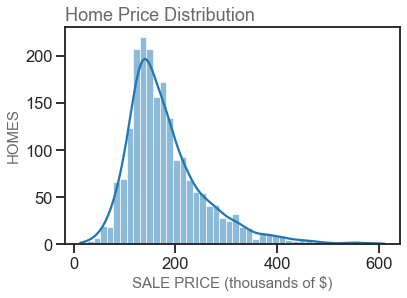

In [18]:
sns.histplot(data = df, x = 'SalePrice', kde = True)
plt.xlabel('SALE PRICE (thousands of $)')
plt.ylabel('HOMES')
plt.title('Home Price Distribution', loc = 'left')
plt.show()

In [19]:
df['Price bin'] = pd.cut(df['SalePrice'], bins = [0, 150, 225, 300, 400, np.inf], labels=['<$150k', '\$150 - $225k', '\$225 - $300k', '\$300 - 400k', '$400k+'])

In [20]:
price_bins = pd.DataFrame(df['Price bin'].value_counts(normalize=False))

In [21]:
price_bins['Target'] = [478, 915, 737, 865, 510]

In [22]:
price_bins.columns = ['2006 - 2010 Sales Data', '2020 - 2040 Projected Demand']

In [23]:
price_bins/= price_bins.sum()/100

In [24]:
price_bins.head()

,2006 - 2010 Sales Data,2020 - 2040 Projected Demand
<$150k,43.100926,13.637660
\$150 - $225k,35.738664,26.105563
\$225 - $300k,13.164310,21.027104
\$300 - 400k,5.753291,24.679030
$400k+,2.242808,14.550642


<Figure size 720x504 with 0 Axes>

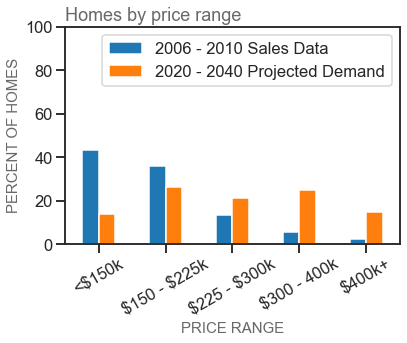

In [25]:
plt.figure(figsize = (10, 7))
price_bins.plot(kind = 'bar')
plt.xticks(rotation = 30)
plt.ylim(0, 100)
plt.title('Homes by price range', loc = 'left')
plt.ylabel('PERCENT OF HOMES')
plt.xlabel('PRICE RANGE')
plt.show()

### Zonings

In [26]:
# gb_comp('MS SubClass', df_orig)

In [27]:
gb_comp('MS Zoning')

,SalePrice,Count
MS Zoning,,
RL,191.235165,1598
RM,129.119142,316
FV,218.618317,101
other,103.290722,36


##### Plot Zoning

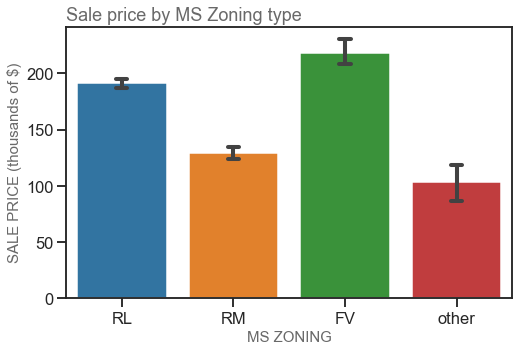

In [28]:
plot_bar('MS Zoning')

In [29]:
gb_comp('is PUD')

,SalePrice,Count
is PUD,,
False,181.801191,1819
True,178.870655,232


### Lots

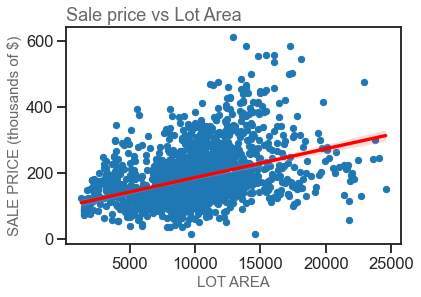

In [30]:
plot_reg('Lot Area', df.query('`Lot Area` < 25000'))

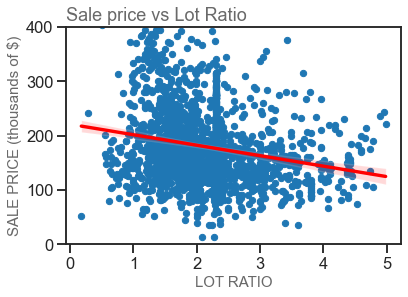

In [31]:
plot_reg('Lot Ratio', df.query('`Lot Ratio` < 5'))

plt.ylim(0, 400)
plt.show()

In [32]:
# plot_reg('Lot Area', df.query('`Lot Area` < 30000'))

In [33]:
gb_comp('Land Contour')

,SalePrice,Count
Land Contour,,
Lvl,178.998565,1843
HLS,262.353376,85
Bnk,142.868775,80
Low,199.313116,43


In [34]:
gb_comp('Lot Config')

,SalePrice,Count
Lot Config,,
Inside,177.537015,1503
Corner,180.629592,348
CulDSac,230.744359,131
FR2,174.703600,60
FR3,198.600000,9


In [35]:
gb_comp('Land Slope')

,SalePrice,Count
Land Slope,,
0,180.358477,1953
1,204.639466,88
2,194.598000,10


### Street / Alley

Too imbalanced don't need to discuss

In [36]:
gb_comp('Alley')

,SalePrice,Count
Alley,,
None,184.366259,1911
Grvl,120.835635,85
Pave,174.534709,55


In [37]:
gb_comp('Street')

,SalePrice,Count
Street,,
True,181.793566,2044
False,86.901429,7


### Neighborhood

In [38]:
gb_comp('Neighborhood', sort_col = 'SalePrice')

,SalePrice,Count
Neighborhood,,
StoneBr,329.675737,38
NridgHt,322.831352,122
NoRidge,316.294125,48
Veenker,253.570588,17
Timber,241.051354,48
Somerst,227.183900,130
ClearCr,217.490074,27
Crawfor,205.901211,71
CollgCr,202.497217,180


<Figure size 864x576 with 0 Axes>

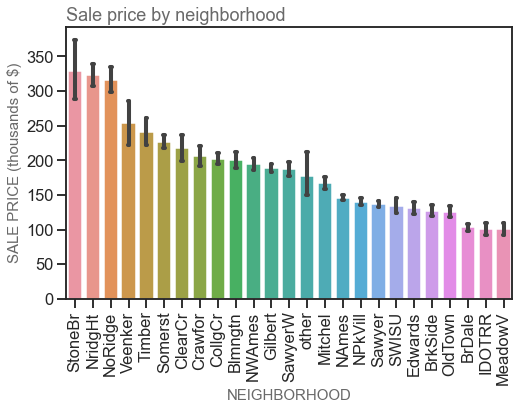

In [39]:
plt.figure(figsize=(12, 8))
plot_bar('Neighborhood', sort_col = 'SalePrice', title = 'Sale price by neighborhood')
plt.xticks(rotation = 90)
plt.show()

### Building type + Style

In [40]:
gb_comp('Bldg Type')

,SalePrice,Count
Bldg Type,,
1Fam,185.275686,1700
TwnhsE,198.312373,161
Duplex,139.296333,75
Twnhs,133.100000,69
2fmCon,123.179891,46


In [41]:
gb_comp('House Style')

,SalePrice,Count
House Style,,
1Story,179.809195,1059
2Story,206.408963,598
1.5Fin,136.480092,218
SLvl,166.248989,94
SFoyer,149.343920,50
2.5Unf,191.785714,14
1.5Unf,112.466667,12
2.5Fin,243.666667,6


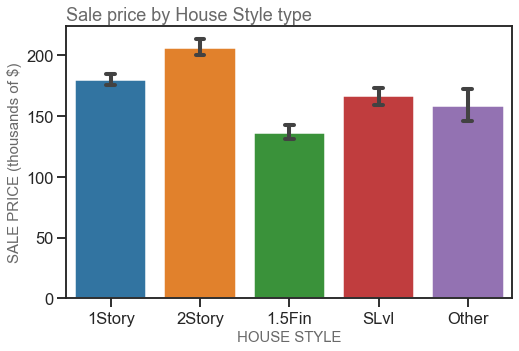

In [42]:
plot_bar('House Style', 
    df = df.replace({'House Style': 
        {'SFoyer': 'Other', '2.5Unf': 'Other', '1.5Unf': 'Other', '2.5Fin': 'Other'}}))

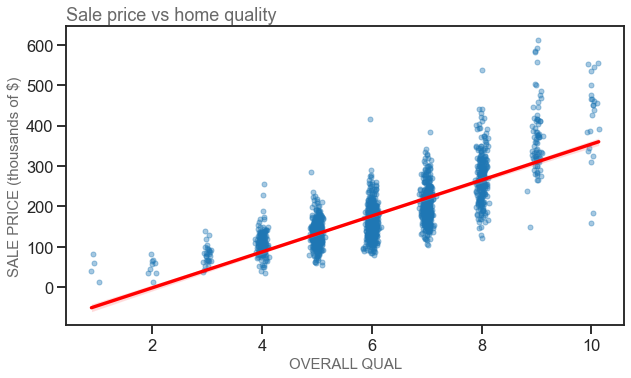

In [72]:
plot_reg('Overall Qual', jitter_x = 0.05, s = 25, alpha = 0.4)
plt.title("Sale price vs home quality", loc = 'left')
plt.show()

### Housing Size

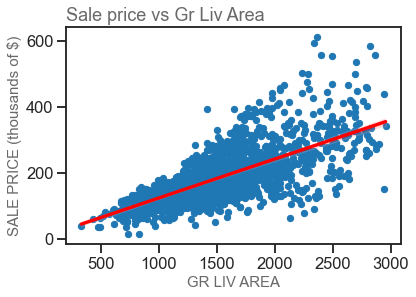

In [44]:
plot_reg('Gr Liv Area', df = df.query('`Gr Liv Area` < 3000'))

### Year

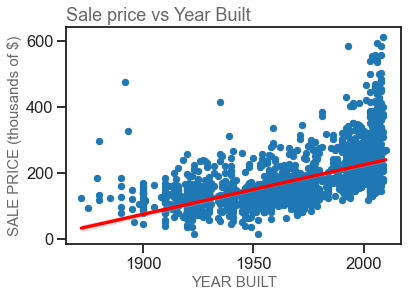

In [45]:
plot_reg('Year Built')

In [46]:
df['Year Built Clipped'] = df['Year Built'].clip(lower = 1900, upper = 2009)

In [47]:
df['Decade'] = df['Year Built Clipped']//10*10

In [48]:
gb_comp('Decade')

,SalePrice,Count
Decade,,
2000,248.754947,562
1970,154.172514,247
1960,151.851576,245
1950,138.572871,241
1990,220.898657,236
1920,122.685710,138
1940,124.966643,112
1980,193.305063,79
1930,138.601500,76


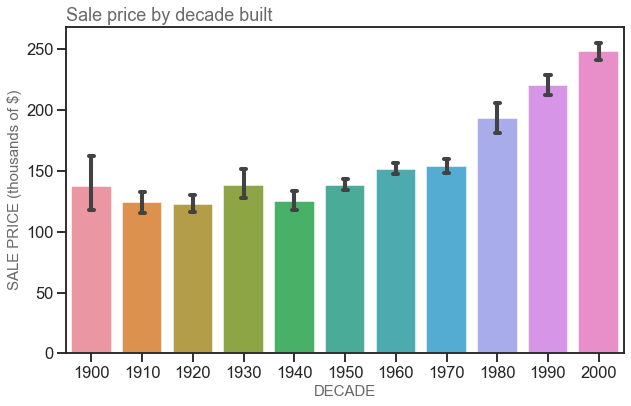

In [74]:
plot_bar('Decade', sort_col='Decade', sort_asc = True)
plt.title('Sale price by decade built', loc = 'left')
plt.show()

### Masonry, Roof Exterior

In [50]:
gb_comp('Mas Vnr Type')

,SalePrice,Count
Mas Vnr Type,,
None,155.120870,1240
BrkFace,212.161437,630
Stone,263.714702,168
BrkCmn,144.515692,13


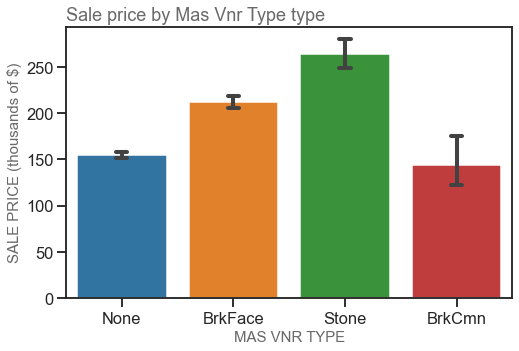

In [51]:
plot_bar('Mas Vnr Type')

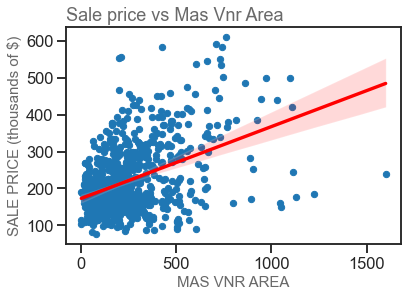

In [52]:
plot_reg('Mas Vnr Area', df = df.query('`Mas Vnr Area` > 0'))

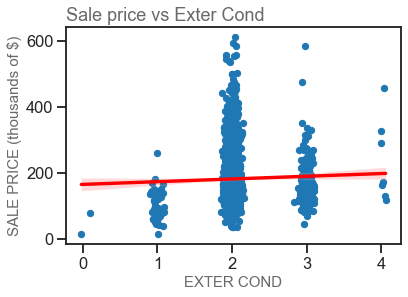

In [53]:
plot_reg('Exter Cond', jitter_x = 0.05)

### Basement

In [54]:
gb_comp('Bsmt GLQ')

,SalePrice,Count
Bsmt GLQ,,
0,156.392181,1413
1,237.009727,638


In [55]:
df.query('`Total Bsmt SF` == 0').shape

(55, 71)

### Garages

In [56]:
gb_comp('Garage Type')

,SalePrice,Count
Garage Type,,
Attchd,205.040195,1213
Detchd,132.132948,536
BuiltIn,247.883523,132
NA,105.669150,113
Basment,143.242333,27
2Types,157.184211,19
CarPort,103.823545,11


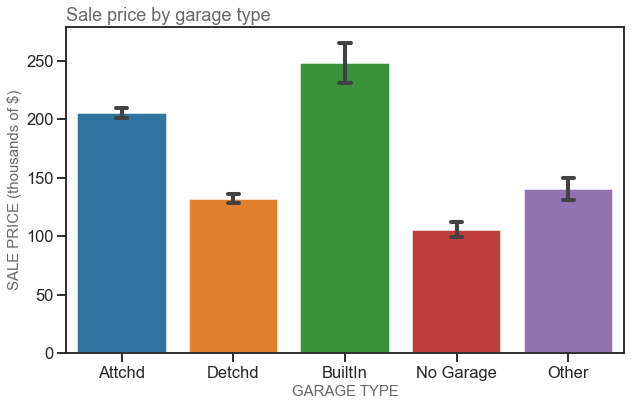

In [76]:
plot_bar('Garage Type',
    df = df.replace({'Garage Type':
        {'NA': 'No Garage', 'Basment': 'Other', '2Types': 'Other', 'CarPort': 'Other'}
    }
))
plt.title('Sale price by garage type', loc = 'left')
plt.show()

### Nearby condition

In [58]:
gb_comp('Cond Pos')

,SalePrice,Count
Cond Pos,,
0,179.976684,2011
1,256.531150,40


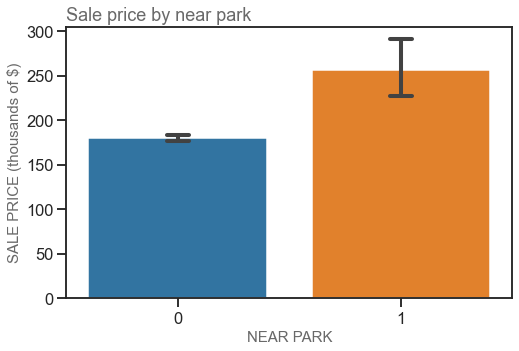

In [59]:
plot_bar('Cond Pos', title = 'Sale price by near park')
plt.xlabel('NEAR PARK')
plt.show()

In [60]:
gb_comp('Cond RR')

,SalePrice,Count
Cond RR,,
0,182.205291,1981
1,160.652529,70


### House quality